In [2]:
from sklearn import datasets

In [3]:
import numpy as np

In [13]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]] #petal length and petal width
y = iris.target
print('Class labels:', np.unique(y)) #Iris-setosa, Irisversicolor, and Iris-virginica

Class labels: [0 1 2]


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1,stratify=y)

In [16]:
print('Labels counts in y:', np.bincount(y))
print('labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [17]:
from sklearn.preprocessing import StandardScaler

In [33]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [19]:
from sklearn.linear_model import Perceptron

In [53]:
ppn = Perceptron(n_iter=60, eta0=0.01, random_state=1)
ppn.fit(X_train_std, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.01,
      fit_intercept=True, max_iter=None, n_iter=60, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=1, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [54]:
y_pred = ppn.predict(X_test_std)

In [55]:
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 3


In [56]:
from sklearn.metrics import accuracy_score

In [57]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.93


In [58]:
print('Accuracy: %.2f' % ppn.score(X_test_std, y_test))

Accuracy: 0.93


In [43]:
from matplotlib.colors import ListedColormap 
import matplotlib.pyplot as plt

In [60]:
def plot_decision_regions(X, y, classifier, test_idx=None,resolution=0.02): 
    # setup marker generator and color map    
    markers = ('s', 'x', 'o', '^', 'v')    
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')    
    cmap = ListedColormap(colors[:len(np.unique(y))])    
    # plot the decision surface    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1    
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)    
    Z = Z.reshape(xx1.shape)    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)    
    plt.xlim(xx1.min(), xx1.max())    
    plt.ylim(xx2.min(), xx2.max())    
    for idx, cl in enumerate(np.unique(y)):        
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],                   
                    alpha=0.8, c=colors[idx],                    
                    marker=markers[idx], label=cl,                     
                    edgecolor='black')    
        # highlight test samples    
        if test_idx:        
            # plot all samples        
            X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],                    
                    c='', edgecolor='black', alpha=1.0,                    
                    linewidth=1, marker='o',                    
                    s=100, label='test set')

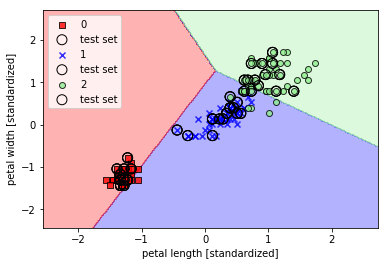

In [61]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show() 